# Introduction
## Phase 1 Project
This is an "end-of-phase" project that I am conducting within the Flatiron School curriculum. For this project, I will be looking at NYC's 311 database which contains records of every 311 Service Request since 2010. With this I will be asking at least five descriptive questions and presenting my findings.
## Descriptive Questions
These questions are questions that the data found in this project will answer

* Which Agency handled the most amount of service requests in 2023?
* On Average, How Long Did Each Agency Take to Respond to a Service Request in 2023?
* In 2023, What was the Relationship Between Agency’s Response Time and Amount of Service Requests?
* What were the Most Common Types of Service Requests in 2023?
* Which Agency Handled the Most Common Requests in 2023?
* How Many Service Requests did Each Borough Have During 2023?
* What was the Relationship Between Borough Population and Amount of Service Requests?

## Data
The data I will be using is found from the NYC Open Data database and contains over 36 million 311 service requests starting from 2010 until July 7, 2024 when I downloaded the data. For this project I will be looking at the data recorded in 2023.

#### Imports
To start, I am going to import the 4 major python packages I will be using
* Pandas
* NumPy
* Matplotlib
* Seaborn



In [163]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [164]:
# turning my dataset into a pandas dataframe
nyc = pd.read_csv('NYC-311-Service-Requests-AdditionalFiles/311_Service_Requests.csv')

C:\Users\Shank\AppData\Local\Temp\ipykernel_9996\704009859.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc = pd.read_csv('NYC-311-Service-Requests-AdditionalFiles/311_Service_Requests.csv')


#### Data Cleaning
I was able to do a lot of my data cleaning during the data acquisition at the website containing the data allowing me to filter out columns and entries that I didn't want to use.

In [165]:
# I like using tail instead of head because it will show me the highest index I have in my dataframe
nyc.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Police Precinct
4929457,56418136,01/01/2023 12:00:46 AM,01/01/2023 01:01:43 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11234.0,1621 EAST 51 STREET,...,18 BROOKLYN,3.078760e+09,BROOKLYN,1004782.0,165410.0,ONLINE,40.620665,-73.926040,"(40.62066491675458, -73.92604033064251)",38.0
4929458,56418795,01/01/2023 12:00:45 AM,01/01/2023 01:24:10 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,10001.0,15 HUDSON BOULEVARD,...,04 MANHATTAN,1.007050e+09,MANHATTAN,984043.0,214298.0,MOBILE,40.754875,-74.000747,"(40.75487501846257, -74.00074715055744)",6.0
4929459,56416252,01/01/2023 12:00:42 AM,01/01/2023 05:34:15 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10453.0,1871 SEDGWICK AVENUE,...,05 BRONX,2.028810e+09,BRONX,1007015.0,250368.0,ONLINE,40.853848,-73.917709,"(40.85384789145288, -73.91770920479841)",29.0
4929460,56417527,01/01/2023 12:00:09 AM,01/01/2023 12:36:06 AM,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,AVENUE C,...,12 BROOKLYN,NaN,BROOKLYN,991565.0,172780.0,ONLINE,40.640915,-73.973642,"(40.640914779776715, -73.97364216306418)",39.0
4929461,56416396,01/01/2023 12:00:00 AM,01/03/2023 02:56:48 PM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11379.0,84-46 ELIOT AVENUE,...,05 QUEENS,4.029440e+09,QUEENS,1019280.0,204397.0,ONLINE,40.727630,-73.873614,"(40.72762987830367, -73.87361356231048)",62.0


Next thing for me to do was to prepare my data to answer my questions. My goal is to have all the data in formats and types that I can later call with ease when answering my questions and creating visualizations.

First, I want to get the desired timeframe, which for this project will be the 2023 calender year, turn the dates into a datetime format, and creating a new category that describes the amount of time taken to complete each service request

In [214]:
# Turning the dates into a datetime format
date_format = '%m/%d/%Y %I:%M:%S %p'
nyc['Closed Date'] = pd.to_datetime(nyc['Closed Date'], format=date_format)
nyc['Created Date'] = pd.to_datetime(nyc['Created Date'], format=date_format)
nyc['Created Date Only'] = nyc['Created Date'].dt.date
nyc['Created Time Only'] = nyc['Created Date'].dt.time

In [215]:
# filtering to specifically 2023
nyc_2023 = nyc[nyc['Created Date'].dt.year == 2023]

In [168]:
# finding the elapsed time between the open and close dates
nyc_2023['time_to_complete'] = (nyc_2023['Closed Date'] - nyc_2023['Created Date']).dt.total_seconds()

C:\Users\Shank\AppData\Local\Temp\ipykernel_9996\3807681801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_2023['time_to_complete'] = (nyc_2023['Closed Date'] - nyc_2023['Created Date']).dt.total_seconds()


In [169]:
# removing outliers for inferental analysis
nyc_2023_ttc = nyc_2023[nyc_2023['time_to_complete'] >= 0]

def filter_middle_50_percent(group):
    lower_threshold = group['time_to_complete'].quantile(0.25)
    upper_threshold = group['time_to_complete'].quantile(0.75)
    return group[(group['time_to_complete'] > lower_threshold) & (group['time_to_complete'] < upper_threshold)]

# Apply the function to each group
nyc_2023_ttc = nyc_2023_ttc.groupby('Agency').apply(filter_middle_50_percent).reset_index(drop=True)

C:\Users\Shank\AppData\Local\Temp\ipykernel_9996\2794114566.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nyc_2023_ttc = nyc_2023_ttc.groupby('Agency').apply(filter_middle_50_percent).reset_index(drop=True)


I also want to create my color map, which is a gradient of colors that i can apply to my graphs, at this point. I want to use the colors of the NYC flag which is blue, white and orange stripes.

Also I will import all the logos for each individual agency which will be used in the creation of the graphs

In [170]:
# importing the correct package to create the color map
from matplotlib.colors import LinearSegmentedColormap
# Define the colors: blue to white to orange
colors = ["blue", "white", "orange"]
# Create the colormap
cmap = LinearSegmentedColormap.from_list("blue_white_orange", colors)

In [171]:
# from PIL import Image  # Python Imaging Library

# # Load Images
# DCWP_image = Image.open('DCWP.jpg')
# DEP_image = Image.open('DEP.jpg')
# DHS_image = Image.open('DHS.png')
# DOB_image = Image.open('DOB.jpg')
# DOE_image = Image.open('DOE.png')
# DOHMH_image = Image.open('DOHMH.png')
# DOT_image = Image.open('DOT.png')
# DPR_image = Image.open('DPR.png')
# DSNY_image = Image.open('DSNY.jpg')
# HPD_image = Image.open('HPD.png')
# EDC_image = Image.open('EDC.png')
# NYPD_image = Image.open('NYPD.png')
# OTI_image = Image.open('OTI.jpg')
# TLC_image = Image.open('TLC.png')


## Which Agency handled the most amount of service requests in 2023?
For this question I am going to count each instance where the Agency appears and graph it within a barplot

In [172]:
# getting the value counts for each agency instance
nyc_2023_agency = nyc_2023['Agency'].value_counts()
# Convert each value to a string that signifies it being measured in thousands
nyc_2023_agency_in_thousands = nyc_2023_agency.apply(lambda x: f"{x / 1_000:.2f}K")

C:\Users\Shank\AppData\Local\Temp\ipykernel_9996\233851565.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bars = ax.bar(nyc_2023_agency.index, nyc_2023_agency.values, color=plt.cm.get_cmap(cmap, len(nyc_2023_agency))(np.linspace(0, 1, len(nyc_2023_agency))), width= 0.75, align='center')


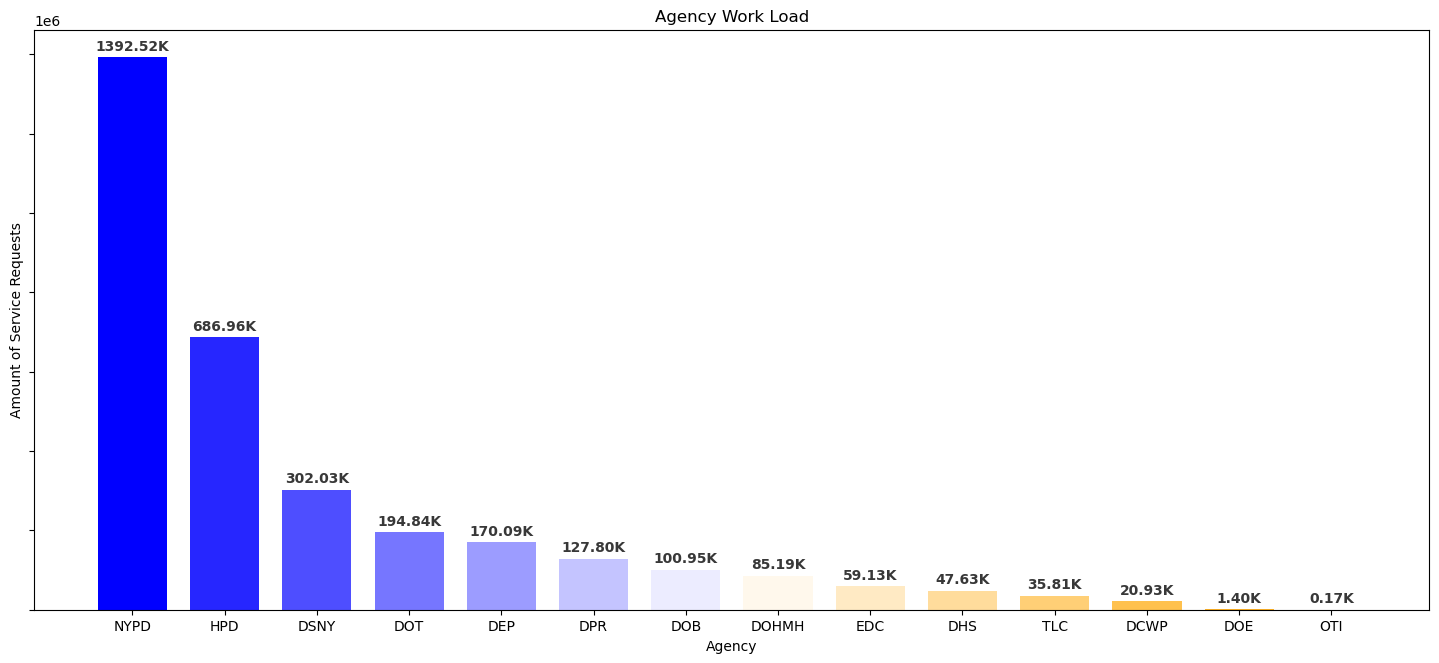

In [173]:
fig, ax = plt.subplots(figsize=(18, 10))
fig.subplots_adjust(bottom=0.3)

# Plot bars with colormap
bars = ax.bar(nyc_2023_agency.index, nyc_2023_agency.values, color=plt.cm.get_cmap(cmap, len(nyc_2023_agency))(np.linspace(0, 1, len(nyc_2023_agency))), width= 0.75, align='center')

# Annotate bars with values
for bar, value in zip(bars, nyc_2023_agency_in_thousands.values):
    ax.annotate(f"{value}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', color='#383838')

# Set plot title and labels
plt.title('Agency Work Load')
plt.xlabel('Agency')
plt.ylabel('Amount of Service Requests')
plt.yticks(visible=False)
plt.savefig('Agency Work Load.png')
plt.show()

## On Average, How Long Did Each Agency Take to Respond to a Service Request in 2023?
For this question, I am going to group the data by on the agency and then calculate the mean elasped time

In [174]:
# Values for following graph
nyc_2023_average_time = nyc_2023.groupby('Agency')['time_to_complete'].mean()
nyc_2023_average_time = nyc_2023_average_time.sort_values(ascending=False)
# Convert each value to a string that signifies it being measured in thousands
nyc_2023_agency_response_in_thousands = nyc_2023_average_time.apply(lambda x: f"{x / 1_000:.0f}K")

C:\Users\Shank\AppData\Local\Temp\ipykernel_9996\192292923.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bars = ax.bar(nyc_2023_average_time.index, nyc_2023_average_time.values, color=plt.cm.get_cmap(cmap, len(nyc_2023_agency))(np.linspace(0, 1, len(nyc_2023_agency))), width= 0.75, align='center')


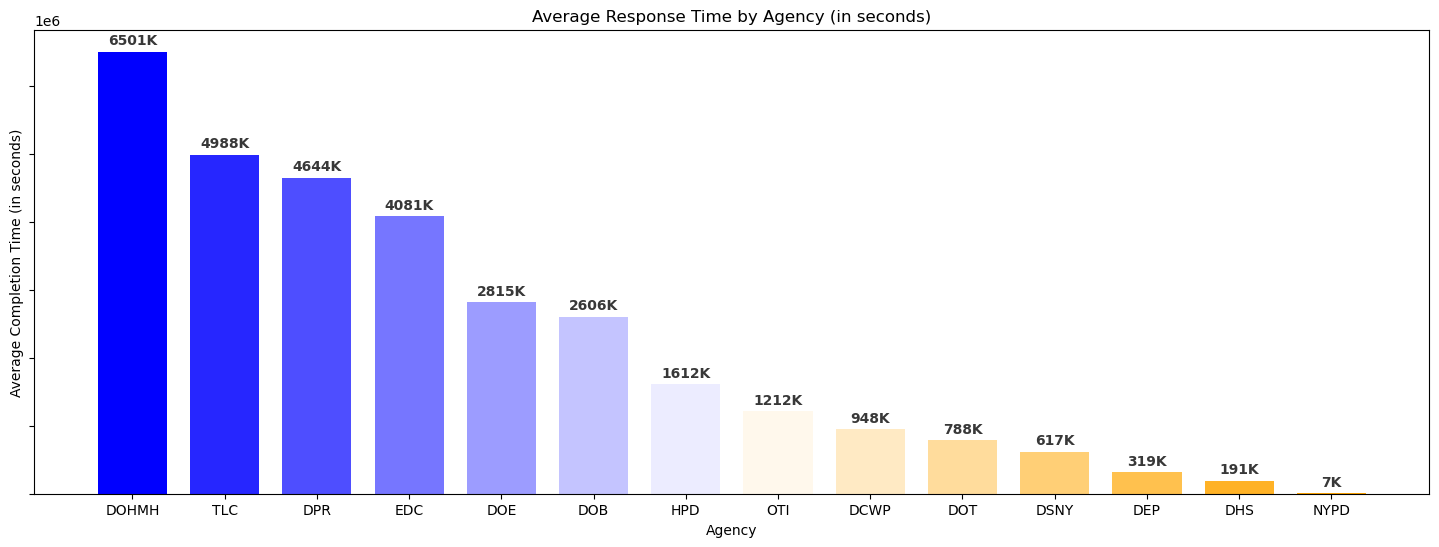

In [175]:
# plot size
fig, ax = plt.subplots(figsize=(18, 8))
fig.subplots_adjust(bottom=0.3)

# data
bars = ax.bar(nyc_2023_average_time.index, nyc_2023_average_time.values, color=plt.cm.get_cmap(cmap, len(nyc_2023_agency))(np.linspace(0, 1, len(nyc_2023_agency))), width= 0.75, align='center')

# Annotate bars with values
for bar, value in zip(bars, nyc_2023_agency_response_in_thousands.values):
    ax.annotate(f"{value}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', color='#383838')
#labels
plt.title('Average Response Time by Agency (in seconds)')
plt.xlabel('Agency')
plt.ylabel('Average Completion Time (in seconds)')
plt.yticks(visible=False)
# plt.savefig('Average Response Time by Agency.png')
plt.show()

## In 2023, What was the Relationship Between Agency’s Response Time and Amount of Service Requests?
My immediate thought was "Are the Agencies that are getting a lot of service requests taking a long time to complete them?" In other words, is a specific agency being overworked?

To answer this, I decided to plot the data from the two previous charts against each other in a scatter plot.

In [176]:
# Getting the values from Question 1
agency_counts = nyc_2023['Agency'].value_counts()

# Getting the values from Question 2
mean_response_time = nyc_2023.groupby('Agency')['time_to_complete'].mean()

# Combine the values into a single DataFrame
combined_counts = pd.DataFrame({
    'Complaint Counts': agency_counts,
    'Mean Response Time': mean_response_time
})

In [177]:
#standardizing my counts to make easier to visualize
counts_time_standardized = (combined_counts['Mean Response Time'] - combined_counts['Mean Response Time'].mean())/combined_counts['Mean Response Time'].std()
counts_agency = combined_counts['Complaint Counts']/1000000

C:\Users\Shank\AppData\Local\Temp\ipykernel_9996\4245958892.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (counts_time_standardized[i], counts_agency[i]))


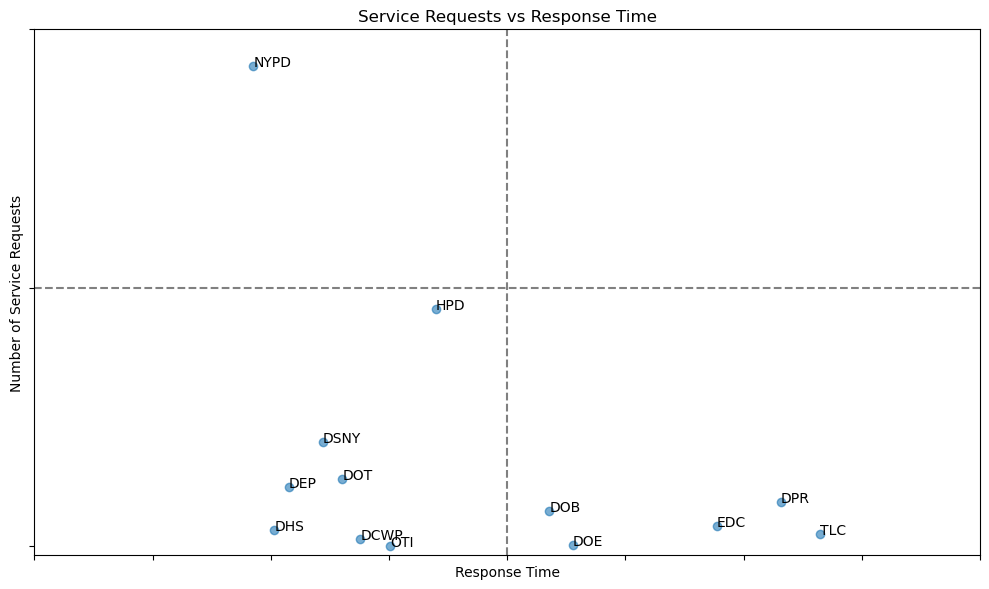

In [178]:
#setting cross lines
complaints_threshold = 0
response_time_threshold = 0.75

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
ax.scatter(y=counts_agency, x=counts_time_standardized, alpha=0.6)

# Add vertical and horizontal lines to create quadrants
ax.axvline(complaints_threshold, color='gray', linestyle='--')
ax.axhline(response_time_threshold, color='gray', linestyle='--')

# Adding the Agency tag to each point
for i, txt in enumerate(combined_counts.index):
    ax.annotate(txt, (counts_time_standardized[i], counts_agency[i]))

# # Adding labels for each quadrant
# ax.text(-3.5, 1.15, "Many Service Requests\nFast Response", color="blue", va="center", ha="center",
#         bbox=dict(facecolor="none", edgecolor="blue"))
# ax.text(3.5, 1.15, "Many Service Requests\nSlow Response", color="red", va="center", ha="center",
#         bbox=dict(facecolor="none", edgecolor="red"))
# ax.text(-3.5, 0.35, "Few Service Requests\n Fast Response", color="green", va="center", ha="center",
#         bbox=dict(facecolor="none", edgecolor="green"))
# ax.text(3.5, 0.35, "Few Service Requests\nSlow Response", color="black", va="center", ha="center",
#         bbox=dict(facecolor="none", edgecolor="black", boxstyle="round,pad=0.5"))

# Set labels, title, and y-axis limits and ticks
ax.set_ylabel('Number of Service Requests')
ax.set_xlabel('Response Time')
plt.title('Service Requests vs Response Time')
ax.set_ylim(-.025, 1.5)
ax.set_yticks([0, 0.75, 1.5])
# ax.set_xticks([-3, 0, 3])
ax.set_xlim (-2,2)
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tight_layout()
# plt.savefig('Service Requests vs Response Time.png')
plt.show()


## What were the Most Common Types of Service Requests in 2023?
## Which Agency Handles the Most Common Requests in 2023?

For this question I wanted to simply graph the value counts for the top 25 most common service requests and apply color coding to the bars with each color representing a different agency

In [179]:
# Getting the top 25 most common service requests
nyc_2023_complaint_type = nyc_2023['Complaint Type'].value_counts().head(25)

In [180]:
# creating a dictionary to store data
nyc_complaint_agency = {}

# Loop through each unique complaint type
for i, complaint_type in enumerate(nyc_2023['Complaint Type'].value_counts().head(25).index):
    mask = nyc_2023['Complaint Type'] == complaint_type
    nyc_2023_complaint_type = nyc_2023[mask]
    nyc_complaint_agency[complaint_type] = nyc_2023_complaint_type['Agency'].value_counts()


data = []
for complaint_type, agency_series in nyc_complaint_agency.items():
    for agency, count in agency_series.items():
        data.append({'Complaint Type': complaint_type, 'Agency': agency, 'Count': count})

# Convert the list of dictionaries to a DataFrame
nyc_complaints_agency_df = pd.DataFrame(data)

In [181]:
# creating the labels that go onto of the bars
nyc_complaints_agency_df['Count_Label'] = nyc_complaints_agency_df['Count'].apply(lambda x: f"{x / 1_000:.2f}K")

In [182]:
# setting the colors for each agency
agency_colors = {
    'NYPD': 'blue',
    'HPD': 'green',
    'DSNY': 'orange',
    'DOT': 'purple',
    'DEP': 'red',
    'DPR': 'cyan',
    'DOB': 'magenta',
    'DOHMH': 'yellow',
    'EDC': 'brown',
    'DHS': 'pink',
    'TLC': 'gray',
    'DCWP': 'black',
    'DOE': 'white',
    'OTI': 'lime'
}

# Apply colors based on 'Agency' column
colors = nyc_complaints_agency_df['Agency'].map(agency_colors)

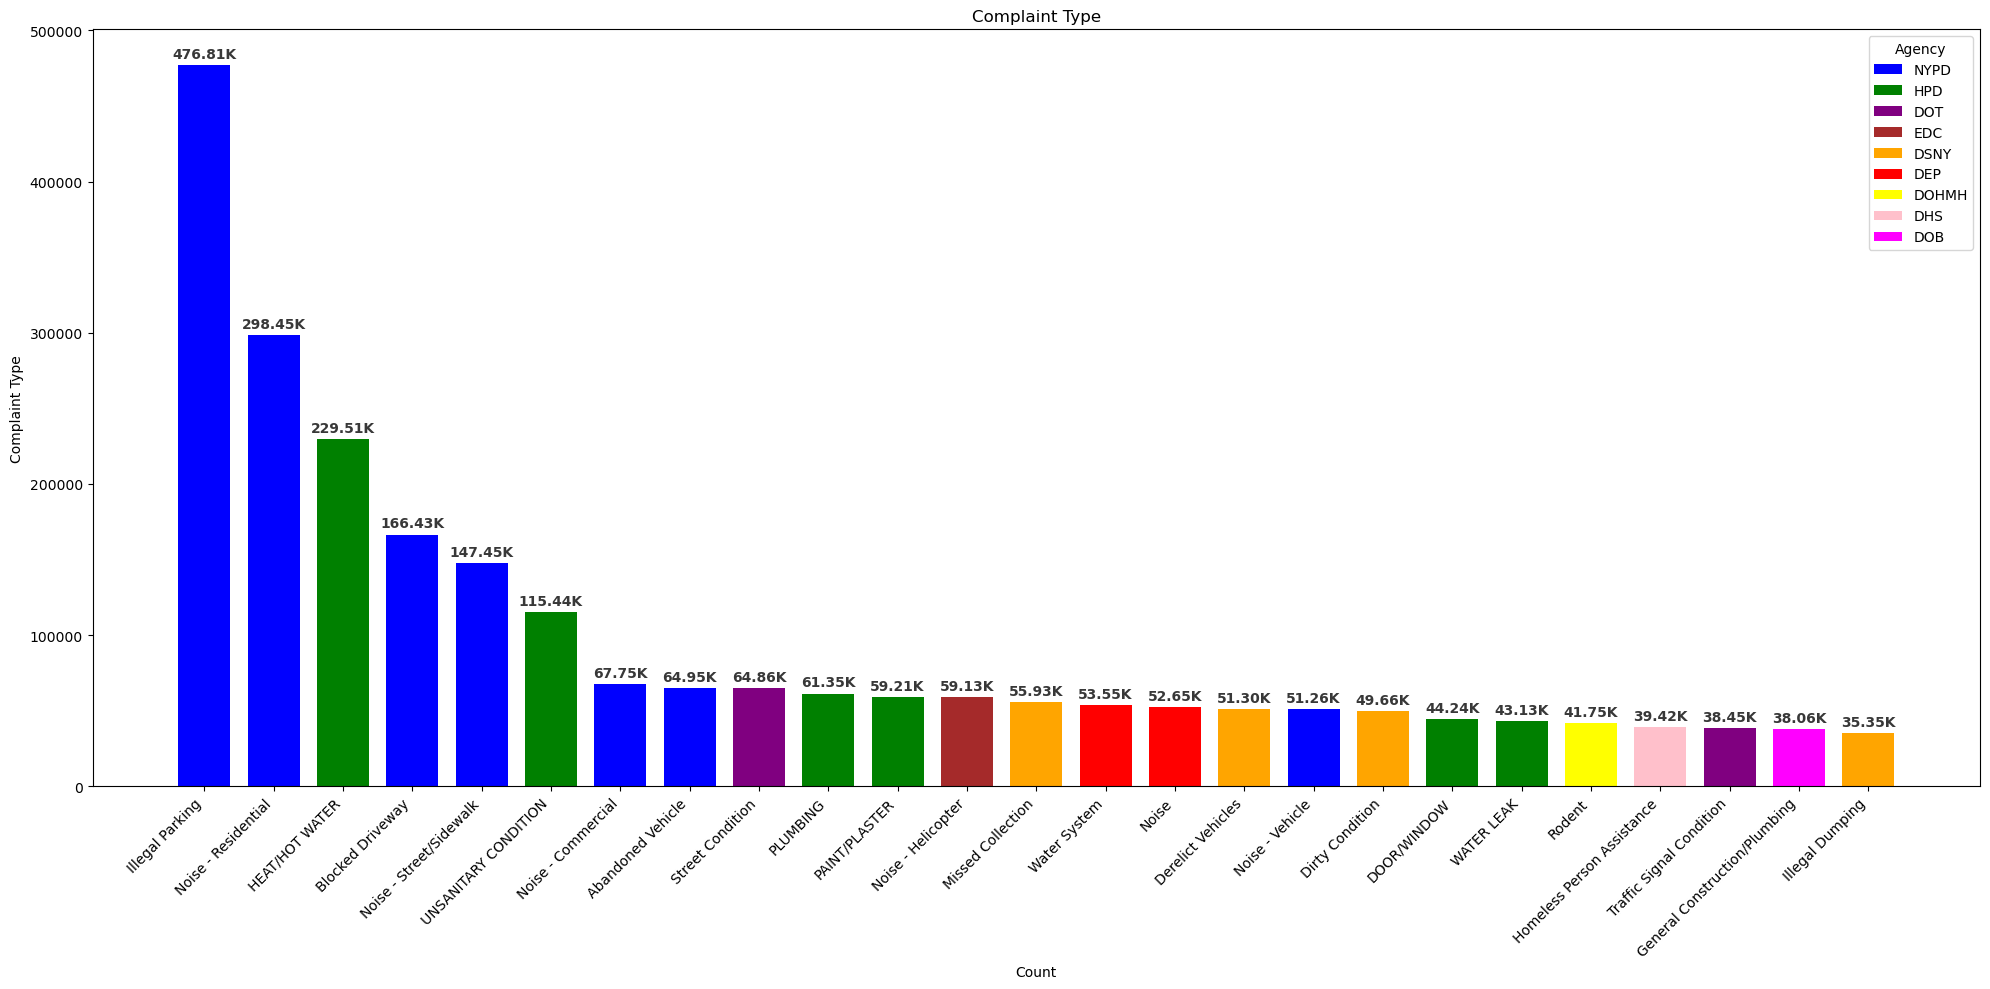

In [183]:
fig, ax = plt.subplots(figsize=(20, 10))
bars = ax.bar(nyc_complaints_agency_df['Complaint Type'], nyc_complaints_agency_df['Count'], width= 0.75, align='center', color=colors)
for bar, value in zip(bars, nyc_complaints_agency_df['Count_Label']):
    ax.annotate(f"{value}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', color='#383838')
# Create legend using unique agencies and their corresponding bar handles
handles = []
labels = []
for bar, agency in zip(bars, nyc_complaints_agency_df['Agency']):
    if agency not in labels:
        handles.append(bar)
        labels.append(agency)

ax.legend(handles=handles, labels=labels, title="Agency")
plt.title('Complaint Type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Count')
plt.ylabel('Complaint Type')
plt.tight_layout()
plt.savefig('Complaint Type.png')
plt.show()


## How Many Service Requests did Each Borough Have During 2023?
For this, I am going to use the 'Borough' column and count every instance

In [184]:
# creating a dictionary with borough population, abreviation and count
boroughs = {'Bronx':{
            'Pop' : 1356476,
            'ABV' : 'BRX',
            'C_Count': 627761},
            'Brooklyn':{
            'Pop' : 2561225,
            'ABV' : 'BKN',
            'C_Count': 1001154},
            'Manhattan':{
            'Pop' : 1597451,
            'ABV' : 'MHTN',
            'C_Count': 685483},
            'Queens':{
            'Pop' : 2252196,
            'ABV' : 'QUEN',
            'C_Count': 776930},
            'Staten Island':{
            'Pop' : 490687,
            'ABV' : 'STN ISLD',
            'C_Count': 128079}}

# turning the dictionary into a dataframe
boroughs_df = pd.DataFrame(boroughs).T
boroughs_df.reset_index(inplace=True)
boroughs_df.rename(columns={'index': 'Borough'}, inplace=True)

In [185]:
# creating the labels that go onto of the bars
boroughs_df['C_Count_Label'] = boroughs_df['C_Count'].apply(lambda x: f"{x / 1_000:.2f}K")

C:\Users\Shank\AppData\Local\Temp\ipykernel_9996\1842431611.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bars = ax.bar(boroughs_df['Borough'], boroughs_df['C_Count'], width= 0.5, align='center',color=plt.cm.get_cmap(cmap, 2)(np.linspace(0, 1, 2)))


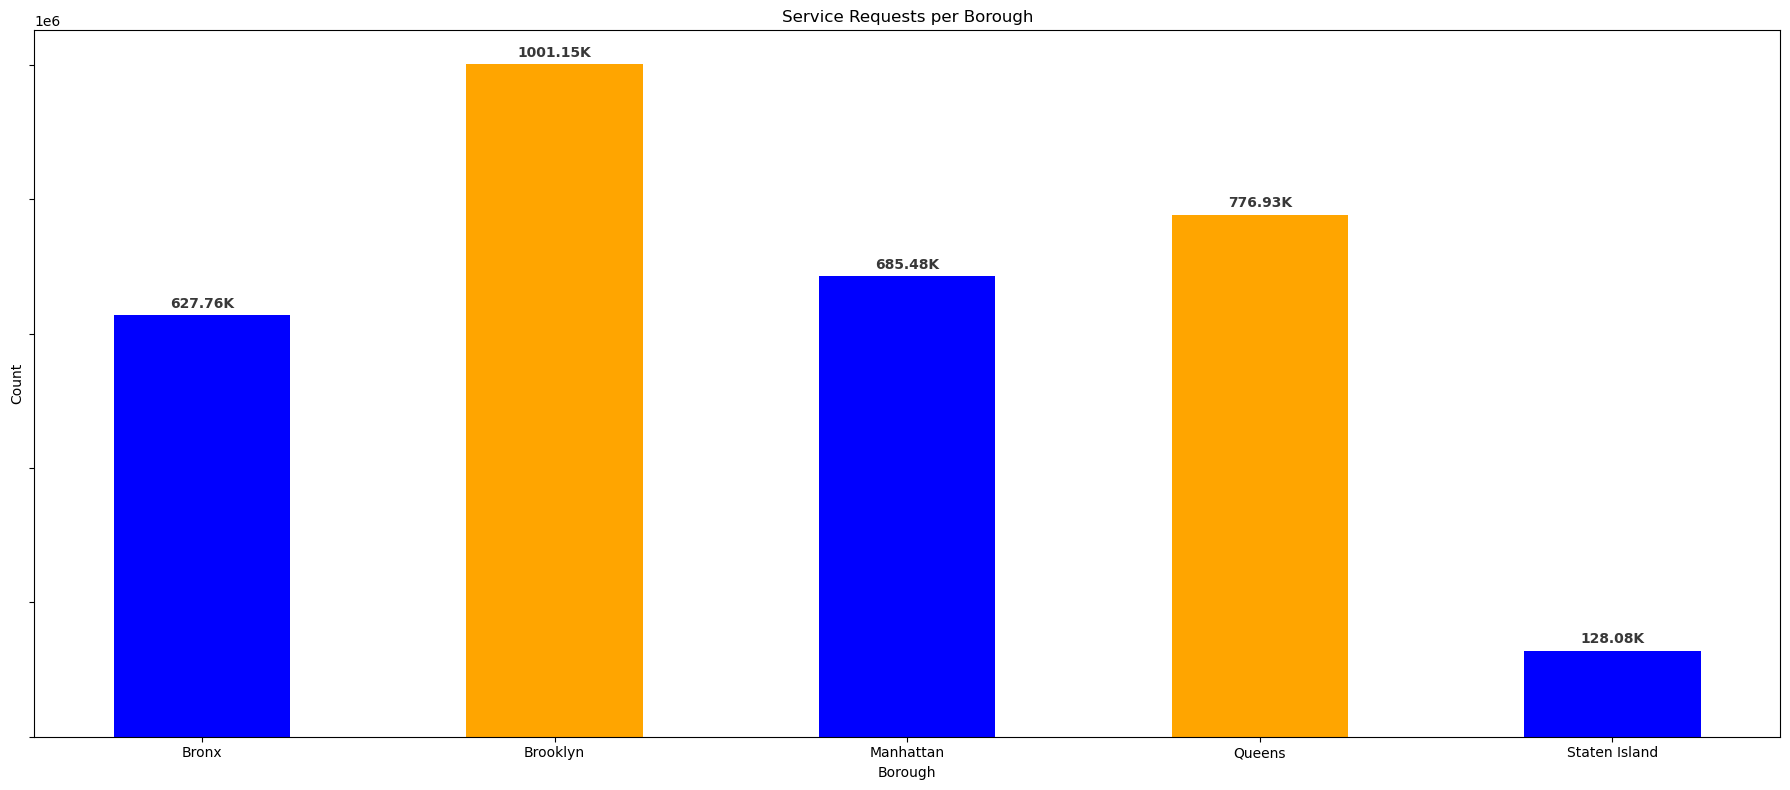

In [186]:
fig, ax = plt.subplots(figsize=(18, 8))
bars = ax.bar(boroughs_df['Borough'], boroughs_df['C_Count'], width= 0.5, align='center',color=plt.cm.get_cmap(cmap, 2)(np.linspace(0, 1, 2)))
for bar, value in zip(bars, boroughs_df['C_Count_Label']):
    ax.annotate(f"{value}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', color='#383838')
plt.title('Service Requests per Borough')
plt.ylabel('Count')
plt.xlabel('Borough')
plt.yticks(visible=False)
plt.tight_layout()
plt.savefig('Service Requests per Borough.png')
plt.show()

## What was the Relationship Between Borough Population and Amount of Service Requests?

For this, I took the values from the previous chart and placed them in a scatter plot against the population count.

In [187]:
#standardizing my counts to make easier to visualize
boroughs_pop_standardized =  (boroughs_df['Pop'] - boroughs_df['Pop'].mean())/boroughs_df['Pop'].std()
boroughs_count_standardized = (boroughs_df['C_Count'] - boroughs_df['C_Count'].mean())/boroughs_df['C_Count'].std()

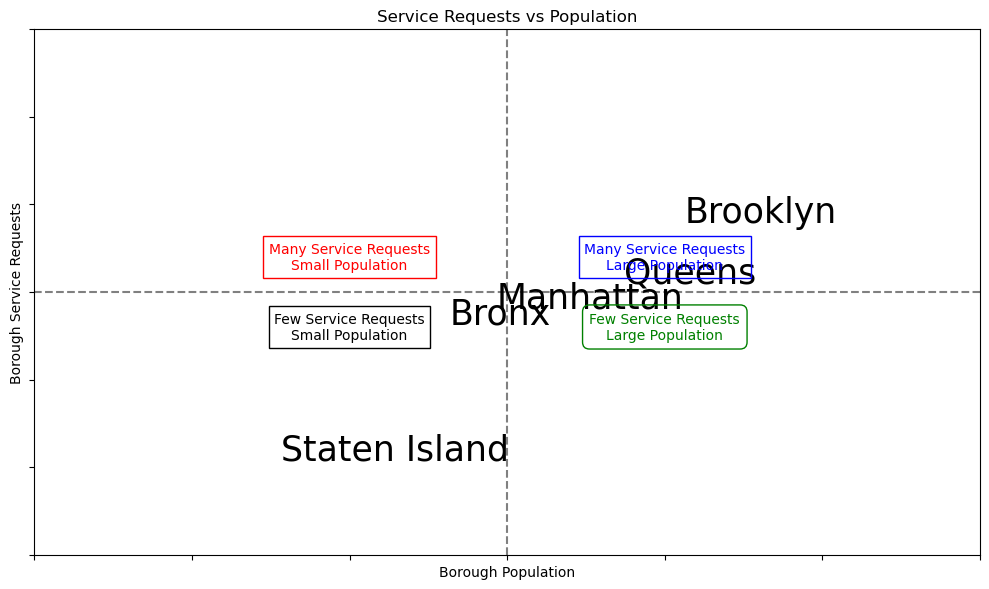

In [188]:
#setting cross lines
complaints_threshold = 0
response_time_threshold = 0

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
ax.scatter(x=boroughs_pop_standardized, y=boroughs_count_standardized, alpha=0)

# Add vertical and horizontal lines to create quadrants
ax.axvline(complaints_threshold, color='gray', linestyle='--')
ax.axhline(response_time_threshold, color='gray', linestyle='--')

# Adding the tag to each point
for i, txt in enumerate(boroughs_df["Borough"]):
    ax.annotate(txt, (boroughs_pop_standardized[i], boroughs_count_standardized[i]), fontsize=25, va='top')

# Adding labels for each quadrant
ax.text(-1, 0.4, "Many Service Requests\nSmall Population", color="red", va="center", ha="center",
        bbox=dict(facecolor="none", edgecolor="red"))
ax.text(1, 0.4, "Many Service Requests\nLarge Population", color="blue", va="center", ha="center",
        bbox=dict(facecolor="none", edgecolor="blue"))
ax.text(-1, -0.4, "Few Service Requests\nSmall Population", color="black", va="center", ha="center",
        bbox=dict(facecolor="none", edgecolor="black"))
ax.text(1, -0.4, "Few Service Requests\nLarge Population", color="green", va="center", ha="center",
        bbox=dict(facecolor="none", edgecolor="green", boxstyle="round,pad=0.5"))

# Set labels, title, and y-axis limits and ticks
ax.set_xlabel('Borough Population')
ax.set_ylabel('Borough Service Requests')
plt.title('Service Requests vs Population')
ax.set_xlim(-3, 3)
ax.set_ylim (-3,3)
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tight_layout()
plt.savefig('Service Requests vs Population.png')
plt.show()

# EXTRA:
A little zip code game for the NYC fans, if you know your's or other's NYC Zip code, feel free to throw it in the function that I create here and it will give what service requests were most common in that area.

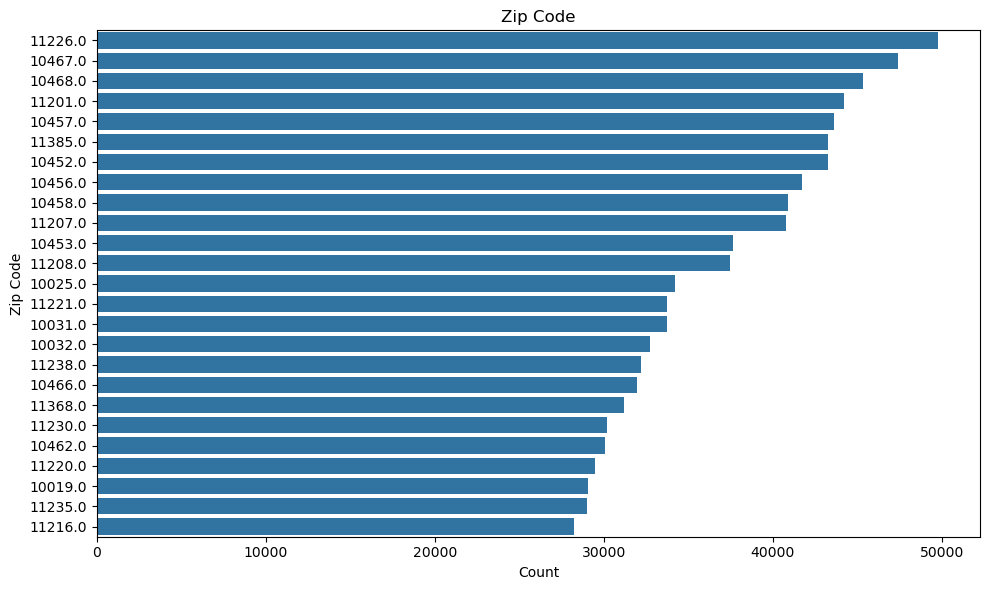

In [189]:

nyc_2023_zips = nyc_2023['Incident Zip'].dropna().astype(str).value_counts().head(25)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=nyc_2023_zips.values, y=nyc_2023_zips.index)
plt.title('Zip Code')
plt.xlabel('Count')
plt.ylabel('Zip Code')
plt.tight_layout()
plt.show()

In [190]:
def zip_srs(zip):
  nyc_2023_zip = nyc_2023[nyc_2023['Incident Zip'] == zip]
  nyc_2023_zip_srs = nyc_2023_zip['Complaint Type'].value_counts().head(10)
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(x=nyc_2023_zip_srs.values, y=nyc_2023_zip_srs.index)
  plt.title('Complaint Type')
  plt.xlabel('Count')
  plt.ylabel('Complaint Type')
  plt.tight_layout()
  plt.show()

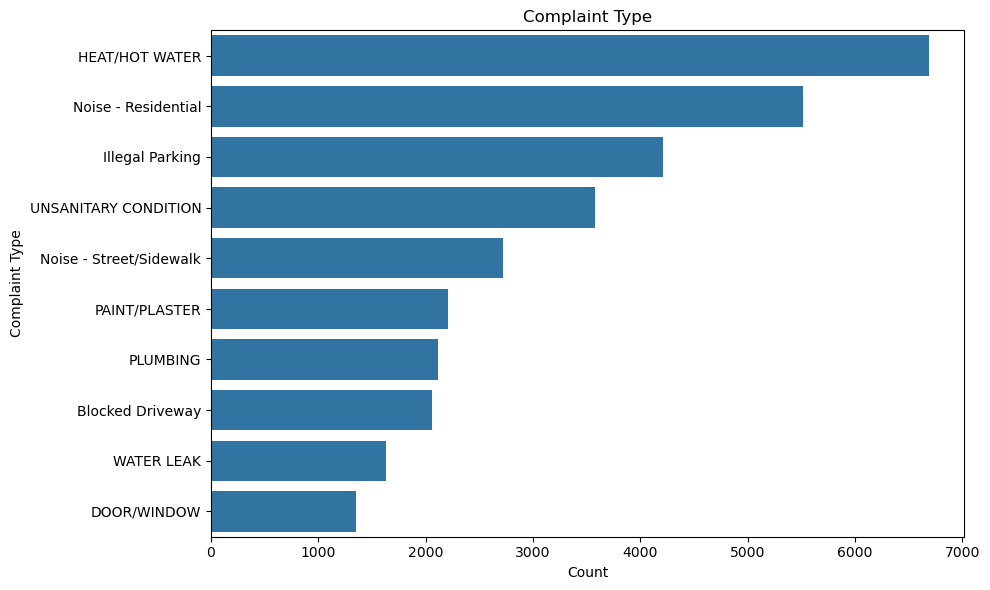

In [191]:
zip_srs(11226)

## Bayes Theorem and Formula Implementation

In the days following the conclusion of the project, as a class, we learned Bayes Theorem. I decided to apply the theorem into this project as it would be a good wasy to practice what Im learning as well as further my data exploration

In [192]:
nyc_2023.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Police Precinct,time_to_complete
1704011,59889383,2023-12-31 23:59:42,2024-01-01 01:51:01,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11375.0,63-10 108 STREET,...,4.021460e+09,QUEENS,1025676.0,206981.0,MOBILE,40.734695,-73.850521,"(40.734694673156454, -73.85052125577377)",70.0,6679.0
1704012,59887573,2023-12-31 23:59:39,2024-01-19 14:37:37,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,10023.0,25 WEST 73 STREET,...,1.011260e+09,MANHATTAN,990853.0,222433.0,ONLINE,40.777201,-73.976159,"(40.77720102455921, -73.976158989108)",12.0,1607878.0
1704013,59892892,2023-12-31 23:59:29,2024-01-01 04:06:24,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11355.0,143-34 BARCLAY AVENUE,...,NaN,QUEENS,1033392.0,215955.0,MOBILE,40.759286,-73.822614,"(40.759286493466355, -73.82261386696051)",67.0,14815.0
1704014,59893860,2023-12-31 23:59:29,2024-01-01 01:51:32,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11374.0,65-09 99 STREET,...,4.021150e+09,QUEENS,1024318.0,205042.0,MOBILE,40.729379,-73.855433,"(40.72937885745978, -73.85543290785074)",70.0,6723.0
1704015,59887231,2023-12-31 23:59:23,2024-01-01 00:13:30,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11232.0,870 42 STREET,...,3.009250e+09,BROOKLYN,984910.0,174167.0,MOBILE,40.644725,-73.997622,"(40.64472479285036, -73.9976217135385)",39.0,847.0


What is the probabilty that a specific agency is requested given that the request is coming from a specific borough?

P(Agency|Borough) = P(A|B)

For this example lets set Agency to NYPD and Borough to Brooklyn

P(NYPD) = P(A)

P(Brooklyn) = P(B)

P(NYPD|Brooklyn) = P(A|B)

P(A|B) = (P(B|A) * P(A))/P(B)

In [193]:
# This is the function to use if you want to find the probabilty that the service request came from a specific borough (i.e. P(Borough) = P(B))
def boroughs_percent(Borough):
    BOROUGH = Borough.upper()
    P_B = nyc_2023['Borough'].value_counts(normalize=True)[BOROUGH].round(4)
    return P_B

In [194]:
# This is the function to use if you want to find the probabilty that the service request requested a specific agency (i.e. P(Agency) = P(A))
def agency_percent(Agency):
    AGENCY = Agency.upper()
    P_A = nyc_2023['Agency'].value_counts(normalize=True)[AGENCY].round(4)
    return P_A

In [195]:
# This is the function to use if you want to find the probabilty that the service request requested a specific agency given that it was in a specific Borough (i.e. P(Agency|Borough) = P(A|B))
def agency_in_borough(Agency, Borough):
    AGENCY = Agency.upper()
    BOROUGH = Borough.upper()
    MASK_BOROUGH = (nyc_2023['Borough'] == BOROUGH)
    nyc_2023_bayes_borough = nyc_2023[MASK_BOROUGH]
    P_AB = nyc_2023_bayes_borough['Agency'].value_counts(normalize=True)[AGENCY].round(4)
    return P_AB

In [196]:
# This is the function to use if you want to find the probabilty that the service request came from a specific borough given that a specific agency responded to the request (i.e. P(Borough|Agency) = P(B|A))
def borough_in_agency(Agency, Borough):
    BOROUGH = Borough.upper()
    AGENCY = Agency.upper()
    MASK_AGENCY = (nyc_2023['Agency'] == AGENCY)
    nyc_2023_bayes_agency = nyc_2023[MASK_AGENCY]
    P_BA = nyc_2023_bayes_agency['Borough'].value_counts(normalize=True)[BOROUGH].round(4)
    return P_BA

To summerize

boroughs_percent = P(B)

agency_percent = P(A)

agency_in_borough = P(A|B)

borough_in_agency = P(B|A)

The following function is the main function to use when solving Bayes theorem probability. It is a combination of all of the previous functions and will calculate the probability two ways
1. It will use the formula of P(A|B) = (P(B|A) * P(A))/P(B)
2. Then it will check the fomula by simply finding P(A|B)

In [197]:
def formula(Agency, Borough):
    BOROUGH = Borough.upper()
    P_B = nyc_2023['Borough'].value_counts(normalize=True)[BOROUGH]
    AGENCY = Agency.upper()
    P_A = nyc_2023['Agency'].value_counts(normalize=True)[AGENCY]
    MASK_BOROUGH = (nyc_2023['Borough'] == BOROUGH)
    nyc_2023_bayes_borough = nyc_2023[MASK_BOROUGH]
    P_AB = nyc_2023_bayes_borough['Agency'].value_counts(normalize=True)[AGENCY]
    MASK_AGENCY = (nyc_2023['Agency'] == AGENCY)
    nyc_2023_bayes_agency = nyc_2023[MASK_AGENCY]
    P_BA = nyc_2023_bayes_agency['Borough'].value_counts(normalize=True)[BOROUGH]
    print(f'Using the fomula, the probability of the {AGENCY} being in {BOROUGH} is {(((P_BA * P_A)/P_B)*100).round(2)}%')
    print(f'The direct probability [P(A|B)] is {((P_AB)*100).round(2)}%')
    

In [198]:
formula(Agency='NYPD', Borough='brooklyn')

Using the fomula, the probability of the NYPD being in BROOKLYN is 44.38%
The direct probability [P(A|B)] is 44.38%


In [199]:
formula(Agency="HPD", Borough="MAnhattan")

Using the fomula, the probability of the HPD being in MANHATTAN is 21.6%
The direct probability [P(A|B)] is 21.6%


In [200]:
formula(Agency='TLC',Borough='Bronx')

Using the fomula, the probability of the TLC being in BRONX is 0.15%
The direct probability [P(A|B)] is 0.15%


### Implementing Inferential Analysis
In the weeks following this project, my cohort and I studied inferential analysis techneqies. In this section i plan to implement those technequies and perform hypothesis testing on the data

First I want to perform an ANOVA test comparing all of the different agency's response times.

# Null Hypothesis

The null hypothesis ($H_0$) states that there is no significant difference between the groups being compared. Formally, it can be written as:

$H_0$: $\mu_1$ = $\mu_2$ = $\mu_3$ = $\mu_4$ = $\mu_5$ = $\mu_6$ = $\mu_7$ = $\mu_8$ = $\mu_9$ = $\mu_{10}$ = $\mu_{11}$ = $\mu_{12}$ = $\mu_{13}$ = $\mu_{14}$

where:
- $\mu_1$ is the mean of NYPD Response Times
- $\mu_2$ is the mean of HPD Response Times
- $\mu_3$ is the mean of DSNY Response Times
- $\mu_4$ is the mean of DOT Response Times
- $\mu_5$ is the mean of DEP Response Times
- $\mu_6$ is the mean of DPR Response Times
- $\mu_7$ is the mean of DOB Response Times
- $\mu_8$ is the mean of DOHMH Response Times
- $\mu_9$ is the mean of EDC Response Times
- $\mu_{10}$ is the mean of DHS Response Times
- $\mu_{11}$ is the mean of TLC Response Times
- $\mu_{12}$ is the mean of DCWP Response Times
- $\mu_{13}$ is the mean of DOE Response Times
- $\mu_{14}$ is the mean of OTI Response Times

# Alternate Hypothesis

The alternate hypothesis ($H_A$) states that the null hypothesis ($H_0$) is not true.


In [201]:
# Setting our significance level to 0.01
def test_f_oneway(p=p_value, alpha=0.01):
  conclusion = 'significant' if p < alpha else 'not significant'
  print(f'''The difference between the different groups was {conclusion} for a significance level of {alpha}.''')

In [203]:
NYPD_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'NYPD']['time_to_complete']
HPD_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'HPD']['time_to_complete']
DSNY_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'DSNY']['time_to_complete']
DOT_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'DOT']['time_to_complete']
DEP_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'DEP']['time_to_complete']
DPR_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'DPR']['time_to_complete']
DOB_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'DOB']['time_to_complete']
DOHMH_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'DOHMH']['time_to_complete']
EDC_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'EDC']['time_to_complete']
DHS_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'DHS']['time_to_complete']
TLC_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'TLC']['time_to_complete']
DOE_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'DOE']['time_to_complete']
OTI_rt = nyc_2023_ttc[nyc_2023_ttc['Agency'] == 'OTI']['time_to_complete']

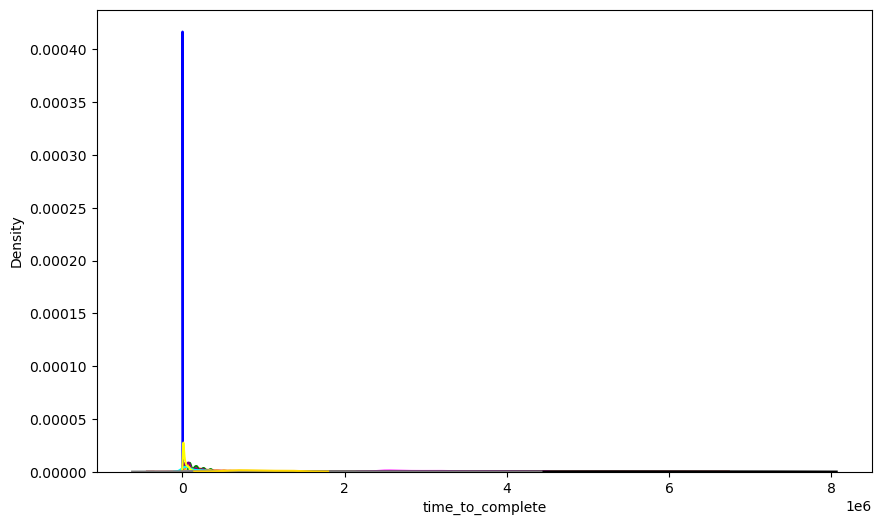

In [204]:
plt.figure(figsize=(10, 6))
sns.kdeplot(NYPD_rt, label=('NYPD'), color='blue')
sns.kdeplot(HPD_rt, label=('HPD'), color='red')
sns.kdeplot(DSNY_rt, label=('DSNY'), color='green')
sns.kdeplot(DOT_rt, label=('DOT'), color='orange')
sns.kdeplot(DEP_rt, label=('DEP'), color='purple')
sns.kdeplot(DPR_rt, label=('DPR'), color='brown')
sns.kdeplot(DOB_rt, label=('DOB'), color='pink')
sns.kdeplot(DOHMH_rt, label=('DOHMH'), color='cyan')
sns.kdeplot(EDC_rt, label=('EDC'), color='magenta')
sns.kdeplot(DHS_rt, label=('DHS'), color='yellow')
sns.kdeplot(TLC_rt, label=('TLC'), color='black')
sns.kdeplot(DOE_rt, label=('DOE'), color='gray')
sns.kdeplot(OTI_rt, label= 'OTI ', color='gold')
plt.show()

In [241]:
_, p_value = stats.kruskal(NYPD_rt, HPD_rt, DSNY_rt, DOT_rt, DEP_rt, DPR_rt, DOB_rt, DOHMH_rt, EDC_rt, DHS_rt, TLC_rt, DOE_rt, OTI_rt)

In [242]:
p_value

0.0

In [243]:
test_f_oneway()

The difference between the different groups was significant for a significance level of 0.01.


In [209]:
BROOKLYN_rt = nyc_2023_ttc[nyc_2023_ttc['Borough'] == 'BROOKLYN']['time_to_complete']
MANHATTAN_rt = nyc_2023_ttc[nyc_2023_ttc['Borough'] == 'MANHATTAN']['time_to_complete']
BRONX_rt = nyc_2023_ttc[nyc_2023_ttc['Borough'] == 'BRONX']['time_to_complete']
STATEN_ISLAND_rt = nyc_2023_ttc[nyc_2023_ttc['Borough'] == 'STATEN ISLAND']['time_to_complete']
QUEENS_rt = nyc_2023_ttc[nyc_2023_ttc['Borough'] == 'QUEENS']['time_to_complete']

<Axes: xlabel='time_to_complete', ylabel='Density'>

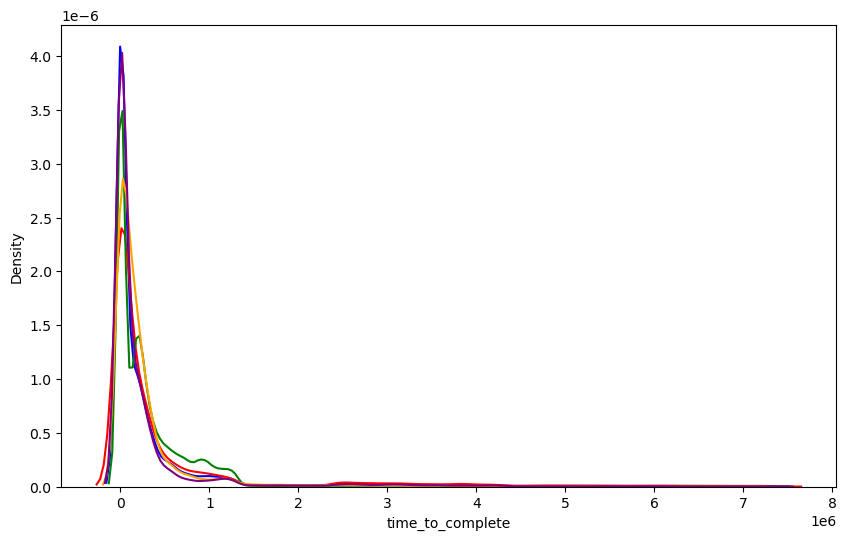

In [210]:
plt.figure(figsize=(10, 6))
sns.kdeplot(BROOKLYN_rt, label=('BROOKLYN'), color='blue')
sns.kdeplot(MANHATTAN_rt, label=('MANHATTAN'), color='red')
sns.kdeplot(BRONX_rt, label=('BRONX'), color='green')
sns.kdeplot(STATEN_ISLAND_rt, label=('STATEN ISLAND'), color='orange')
sns.kdeplot(QUEENS_rt, label=('QUEENS'), color='purple')

In [247]:
_, p_value = stats.kruskal(BROOKLYN_rt, MANHATTAN_rt, BRONX_rt, STATEN_ISLAND_rt, QUEENS_rt)
print(_, p_value)

22888.808674982512 0.0


In [245]:
p_value

0.0

In [213]:
test_f_oneway()

The difference between the different groups was significant for a significance level of 0.01.


In [227]:
DAY_MASK = (nyc_2023_ttc['Created Date'].dt.hour >= 7) & (nyc_2023_ttc['Created Date'].dt.hour < 19)
NIGHT_MASK = (nyc_2023_ttc['Created Date'].dt.hour >= 19) | (nyc_2023_ttc['Created Date'].dt.hour < 7)

In [228]:
DAY_ttc = nyc_2023_ttc[DAY_MASK]['time_to_complete']
NIGHT_ttc = nyc_2023_ttc[NIGHT_MASK]['time_to_complete']

In [231]:
# Creating a function to plot the KDE of two datasets
def two_sample_kdeplot(dataset1, dataset2, label1 , label2):
    # the plot itself
    plt.figure(figsize=(10, 6))
    # plotting both of the datasets
    sns.kdeplot(dataset1, label=(f'{dataset1}'), color='blue')
    sns.kdeplot(dataset2, label=(f'{dataset2}'), color='red')
    # labeling
    plt.title('KDE Plots of Two Datasets')
    plt.xlabel('Value')
    plt.ylabel('Density')
    # adding annotations
    plt.annotate(label1, xy=(0.7, 0.8), xycoords='axes fraction', color='blue', fontsize=12,
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
    plt.annotate(label2, xy=(0.7, 0.7), xycoords='axes fraction', color='red', fontsize=12,
                bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
    plt.show()

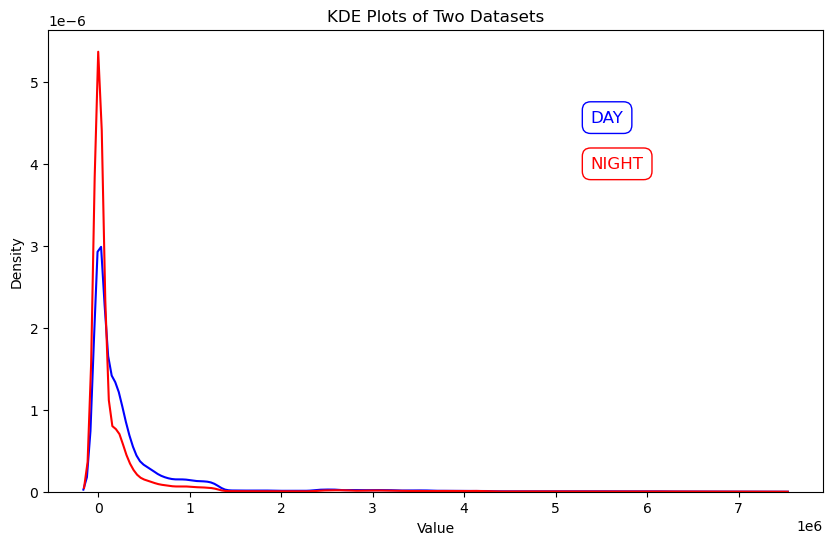

In [232]:
two_sample_kdeplot(DAY_ttc, NIGHT_ttc, label1='DAY', label2= 'NIGHT')

In [237]:
_, p_value = stats.kruskal(DAY_ttc, NIGHT_ttc)

In [238]:
p_value

0.0